In [2]:
from coders import BitStream, WavStream
from coders import SimpleASK as Coder
from gsmpipeline.util import quickplot as qp
import scipy.io.wavfile
%matplotlib inline

Length: 2205000
Quality: 0.7382


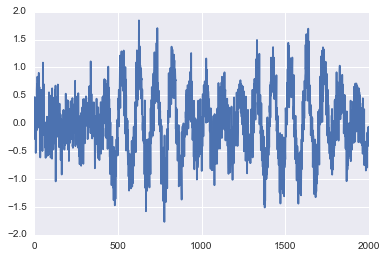

In [13]:
input_stream = BitStream(np.random.randint(2, size=10000))
encoded = Coder.encode(input_stream)
scipy.io.wavfile.write('test.wav', Coder.rate.current, encoded)
decoded_rate, decoded = scipy.io.wavfile.read('test.wav')
noisy = np.random.normal(0, 1, len(decoded)) * 0.3 + decoded
wavstream = WavStream(noisy, decoded_rate, Coder.symbol_duration.current)
check = input_stream.assymbolsize(2) == Coder.decode(decoded_rate, wavstream)
sns.tsplot(wavstream[:2000])
print('Length:', len(wavstream))
print('Quality:', check.sum()/len(check))

Length: 2205000
Quality: 0.7354


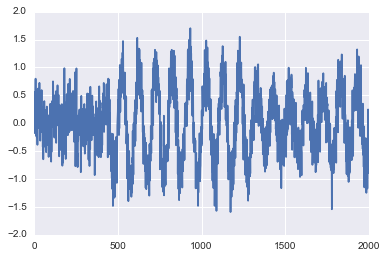

In [14]:
input_stream = BitStream(np.random.randint(2, size=10000))
encoded = Coder.encode(input_stream)
scipy.io.wavfile.write('test.wav', Coder.rate.current, encoded)
decoded_rate, decoded = scipy.io.wavfile.read('test.wav')
noisy = np.random.normal(0, 1, len(decoded)) * 0.3 + decoded
wavstream = WavStream(noisy, decoded_rate, Coder.symbol_duration.current)
check = input_stream.assymbolsize(2) == Coder.decode(decoded_rate, wavstream)
sns.tsplot(wavstream[:2000])
print('Length:', len(wavstream))
print('Quality:', check.sum()/len(check))

In [32]:
stream = data
window_size = 50
shape = 0.5
std = 20
abs1 = False

window = scipy.signal.general_gaussian(window_size, p=shape, sig=std)
stream_f = scipy.signal.fftconvolve(window, stream)
# TODO: Better rebalancing so it can be used for ASK
if abs1:
    stream_f = (np.abs(stream).mean() / np.abs(stream_f).mean()).item() * stream_f
else:
    stream_f = (stream.mean() / stream_f.mean()).item() * stream_f
stream_f = np.roll(stream_f, -window_size//2)

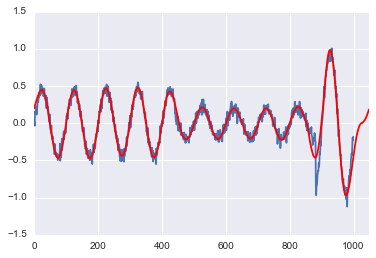

In [33]:
sns.tsplot(stream)
sns.tsplot(stream_f, c='r')

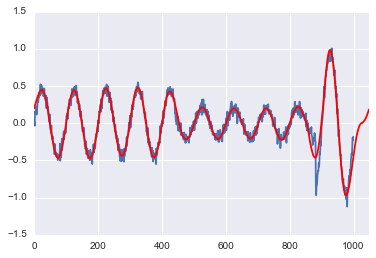

In [34]:
sns.tsplot(stream)
sns.tsplot(stream_f, c='r')

1.000000000000001

1.000000000000001